In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import font_manager, rc
font_path = '/Windows/Fonts/NanumGothic.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
df = pd.read_csv('seoul_apart.csv')
df.head()

,지역명,법정동,거래일,아파트,전용면적,층,건축년도,거래금액
0,서울시 종로구,내수동,2018-01-13,경희궁의아침2단지,140.78,15,2004,130000
1,서울시 종로구,내수동,2018-01-19,경희궁 파크팰리스,103.77,5,2003,96000
2,서울시 종로구,내수동,2018-01-23,경희궁의아침3단지,123.13,10,2004,118000
3,서울시 종로구,내수동,2018-01-30,세종로대우,66.96,13,1994,54500
4,서울시 종로구,내수동,2018-01-31,세종로대우,76.66,11,1994,64000


In [4]:
# 면적당 가격 컬럼 생성
df1 = df.copy()
df1['거래일'] = df1['거래일'].str[:4]
df1['면적당 가격'] = df1['거래금액'] / df1['전용면적']

df1

,지역명,법정동,거래일,아파트,전용면적,층,건축년도,거래금액,면적당 가격
0,서울시 종로구,내수동,2018,경희궁의아침2단지,140.78,15,2004,130000,923.426623
1,서울시 종로구,내수동,2018,경희궁 파크팰리스,103.77,5,2003,96000,925.122868
2,서울시 종로구,내수동,2018,경희궁의아침3단지,123.13,10,2004,118000,958.336717
3,서울시 종로구,내수동,2018,세종로대우,66.96,13,1994,54500,813.918757
4,서울시 종로구,내수동,2018,세종로대우,76.66,11,1994,64000,834.855205
...,...,...,...,...,...,...,...,...,...
630183,서울시 강동구,강일동,2023,강동리버스트4단지,49.82,7,2020,60000,1204.335608
630184,서울시 강동구,강일동,2023,강일리버파크4단지,84.83,5,2009,86000,1013.792290
630185,서울시 강동구,강일동,2023,강일리버파크6단지,84.53,8,2009,85000,1005.560156
630186,서울시 강동구,강일동,2023,강일리버파크3단지,84.53,8,2009,84000,993.730037


### 하나의 구 시각화

In [5]:
df1 = df1[~(df1['거래일'] == '2023')]

Text(0.5, 1.0, '서울시 강동구')

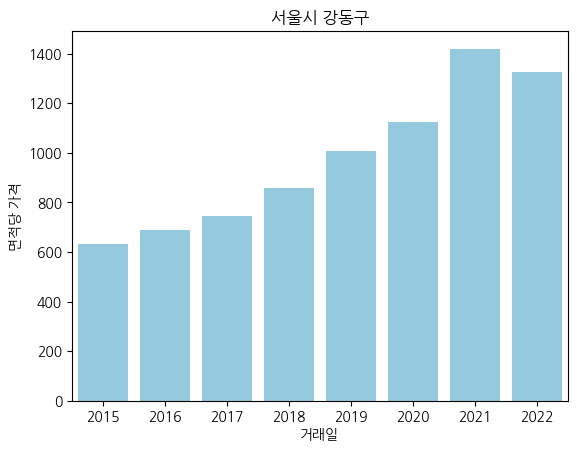

In [6]:
df2 = df1[df1['지역명'] == '서울시 강동구']
df2 = df2[['거래일','면적당 가격']]
df2_group = df2.groupby('거래일').mean().reset_index()
df2_group['거래일'] = df2_group['거래일'].astype('int32')
sns.barplot(df2_group, x='거래일',y='면적당 가격', color='skyblue')
plt.title('서울시 강동구')

### 구별 면적당 가격 연도별로 시각화 

In [7]:
df1['지역명'].unique()

array(['서울시 종로구', '서울시 중구', '서울시 용산구', '서울시 성동구', '서울시 광진구', '서울시 동대문구',
       '서울시 중랑구', '서울시 성북구', '서울시 강북구', '서울시 도봉구', '서울시 노원구', '서울시 은평구',
       '서울시 서대문구', '서울시 마포구', '서울시 양천구', '서울시 강서구', '서울시 구로구', '서울시 금천구',
       '서울시 영등포구', '서울시 동작구', '서울시 관악구', '서울시 서초구', '서울시 강남구', '서울시 송파구',
       '서울시 강동구'], dtype=object)

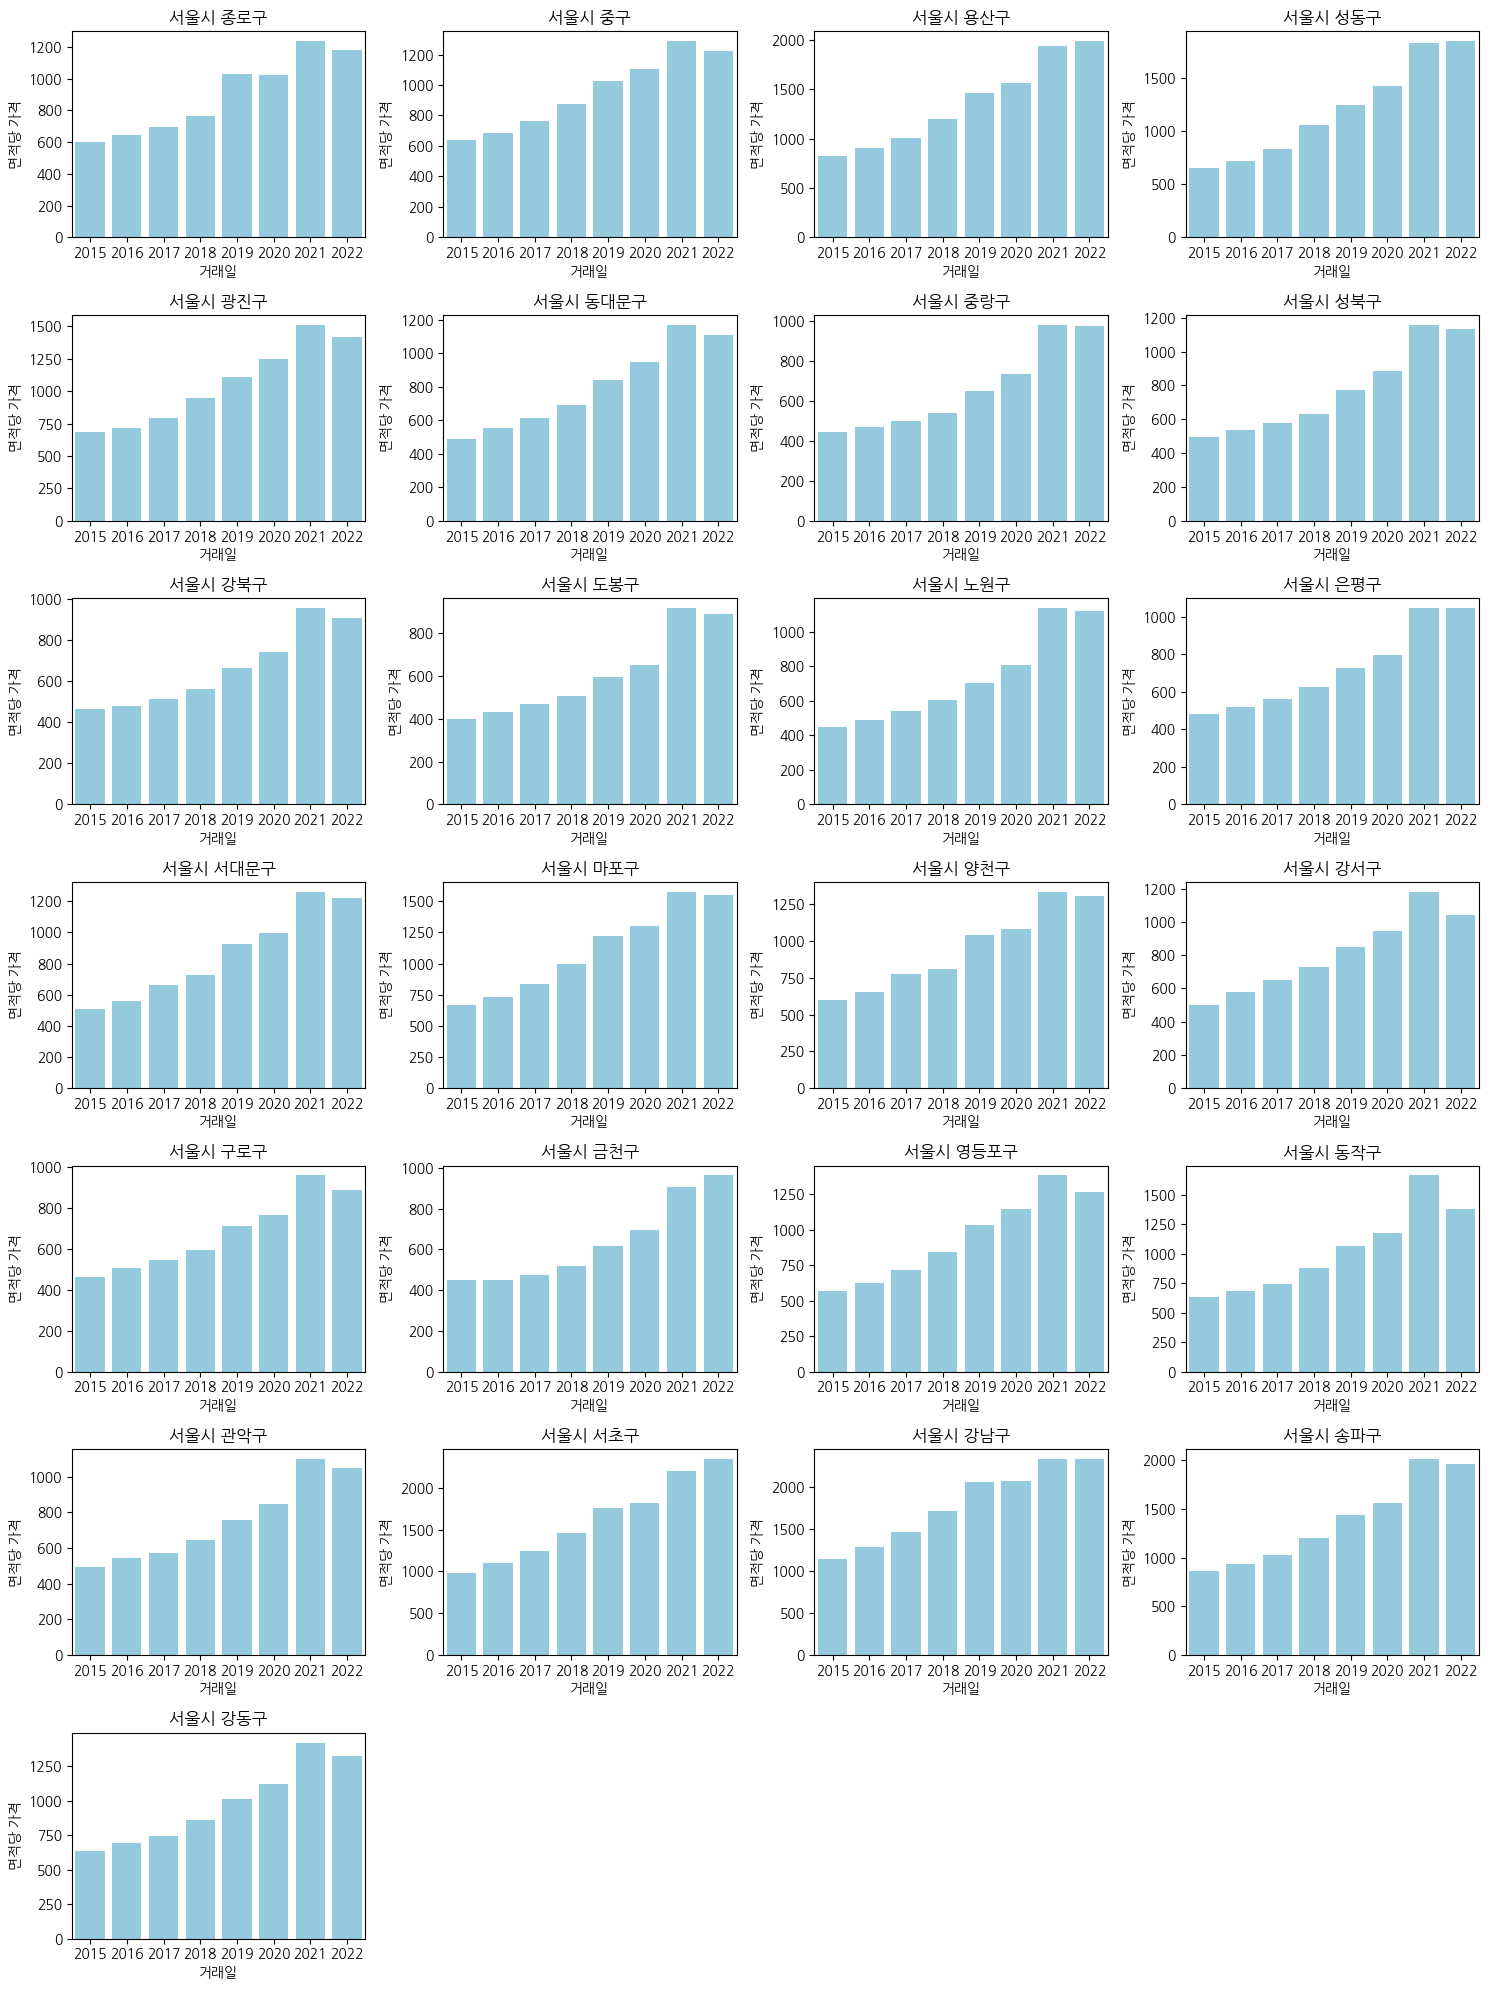

In [8]:
# 시각화할 지역 리스트
regions = ['서울시 종로구', '서울시 중구', '서울시 용산구', '서울시 성동구', '서울시 광진구', '서울시 동대문구',
           '서울시 중랑구', '서울시 성북구', '서울시 강북구', '서울시 도봉구', '서울시 노원구', '서울시 은평구',
           '서울시 서대문구', '서울시 마포구', '서울시 양천구', '서울시 강서구', '서울시 구로구', '서울시 금천구',
           '서울시 영등포구', '서울시 동작구', '서울시 관악구', '서울시 서초구', '서울시 강남구', '서울시 송파구',
           '서울시 강동구']

# 각 구에 대해 25개의 그래프를 생성하여 시각화
plt.figure(figsize=(15, 20))

for i, region in enumerate(regions, 1):
    plt.subplot(7, 4, i)  # 7행 4열의 subplot 중 현재의 subplot 설정
    df_region = df1[df1['지역명'] == region][['거래일', '면적당 가격']]
    df_region_group = df_region.groupby('거래일').mean().reset_index()
    df_region_group['거래일'] = df_region_group['거래일'].astype('int32')
    
    sns.barplot(data=df_region_group, x='거래일', y='면적당 가격', color='skyblue')
    plt.title(region)

# 레이아웃 조정
plt.tight_layout()
plt.show()